In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Analyses
from src.analyses.schedule_jobs_dataframe import jobs_metrics_from_operations_df, mean_start_deviation_per_shift_df

df_experiments = pd.read_csv("data/experiments_v01.csv")
df_experiments

,Experiment_ID,Abs Lateness Ratio,Inner Tardiness Ratio,Max Bottleneck Utilization,Sim Sigma,Shift Length,w_t,w_e,w_dev,Experiment_Type,max_utilization
0,B-1,0.25,1.00,0.75,0.1,1440,1,0,3,CP,0.75
1,B-2,0.25,0.75,0.75,0.1,1440,3,1,12,CP,0.75
2,B-3,0.25,0.50,0.75,0.1,1440,1,1,6,CP,0.75
3,B-4,0.25,0.25,0.75,0.1,1440,1,3,12,CP,0.75
4,B-5,0.25,0.00,0.75,0.1,1440,0,1,3,CP,0.75
...,...,...,...,...,...,...,...,...,...,...,...
175,R-125,1.00,1.00,0.95,0.3,1440,1,0,0,CP,0.95
176,R-126,1.00,0.75,0.95,0.3,1440,3,1,0,CP,0.95
177,R-127,1.00,0.50,0.95,0.3,1440,1,1,0,CP,0.95
178,R-128,1.00,0.25,0.95,0.3,1440,1,3,0,CP,0.95


In [7]:
df_shift_dev = pd.read_csv("data/experiment_shift_dev_v01.csv")

df_dev_mean = (
    df_shift_dev
    .groupby("Experiment_ID")["Deviation",]
    .mean()
    .round(2)  # ➜ Rundet auf 2 Nachkommastellen
    .reset_index()
    .rename(columns={"Deviation": "Deviation_Mean", "Pairs": "Pairs_Mean"})
)
df_experiments = df_experiments.merge(df_dev_mean, on="Experiment_ID", how="left")
df_experiments

,Experiment_ID,Abs Lateness Ratio,Inner Tardiness Ratio,Max Bottleneck Utilization,Sim Sigma,Shift Length,w_t,w_e,w_dev,Experiment_Type,max_utilization,Deviation_Mean
0,B-1,0.25,1.00,0.75,0.1,1440,1,0,3,CP,0.75,38.38
1,B-2,0.25,0.75,0.75,0.1,1440,3,1,12,CP,0.75,10.02
2,B-3,0.25,0.50,0.75,0.1,1440,1,1,6,CP,0.75,11.01
3,B-4,0.25,0.25,0.75,0.1,1440,1,3,12,CP,0.75,10.98
4,B-5,0.25,0.00,0.75,0.1,1440,0,1,3,CP,0.75,16.12
...,...,...,...,...,...,...,...,...,...,...,...,...
175,R-125,1.00,1.00,0.95,0.3,1440,1,0,0,CP,0.95,223.00
176,R-126,1.00,0.75,0.95,0.3,1440,3,1,0,CP,0.95,189.03
177,R-127,1.00,0.50,0.95,0.3,1440,1,1,0,CP,0.95,199.76
178,R-128,1.00,0.25,0.95,0.3,1440,1,3,0,CP,0.95,203.35


In [8]:
df_shift_dev

,Experiment_ID,Shift,Deviation,Pairs
0,B-1,2,55.400000,20
1,B-1,3,85.100000,20
2,B-1,4,86.272727,55
3,B-1,5,33.097561,82
4,B-1,6,17.619048,21
...,...,...,...,...
3775,R-99,18,16.904762,42
3776,R-99,19,58.253165,79
3777,R-99,20,46.968750,32
3778,R-99,21,99.734694,98


## Evaluation

In [9]:
from src.DataFrameEvaluations import plot_experiment_heatmaps_good_low,plot_experiment_boxrow, plot_experiment_lines_compare

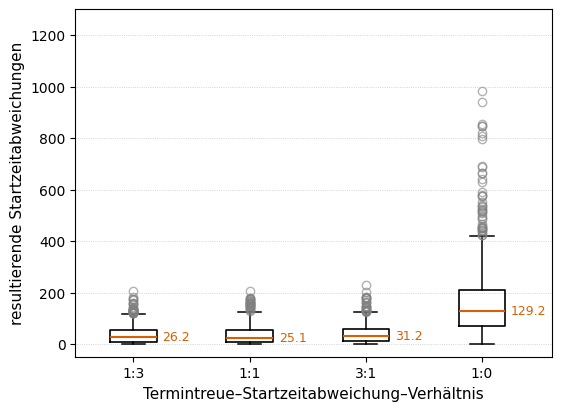

In [10]:
fig, axes = plot_experiment_boxrow(
    df_values=df_shift_dev,
    df_meta=df_experiments,
    value_col="Deviation",
    x_col="Abs Lateness Ratio", x_col_as="Termintreue–Startzeitabweichung–Verhältnis",
    # optional Facetten, falls gewünscht:
    #col_col="Sim Sigma",
    value_as="resultierende Startzeitabweichungen",
    median_fmt = ".1f",
    ymax= 1300,
    fontsize= 11,
    x_lim_extra= 0.6
)
fig.savefig("output/Evaluation_CP_Experiment_boxrow_deviation.pdf", bbox_inches="tight")

plt.show()

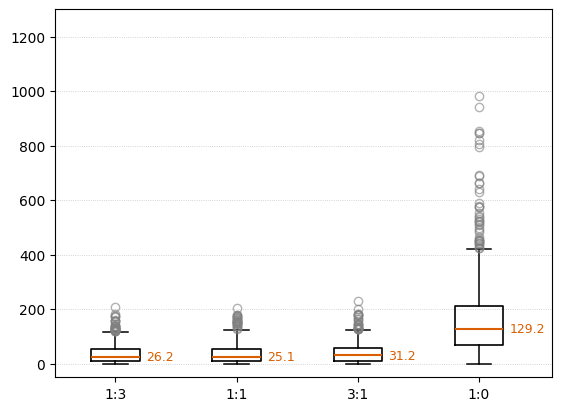

In [11]:
fig, axes = plot_experiment_boxrow(
    df_values=df_shift_dev,
    df_meta=df_experiments,
    value_col="Deviation",
    x_col="Abs Lateness Ratio", x_col_as="",
    # optional Facetten, falls gewünscht:
    #col_col="Sim Sigma",
    value_as="",
    median_fmt = ".1f",
    ymax= 1300,
    fontsize= 11,
    x_lim_extra= 0.6
)
fig.savefig("output/Evaluation_CP_Experiment_boxrow_deviation.pdf", bbox_inches="tight")

plt.show()

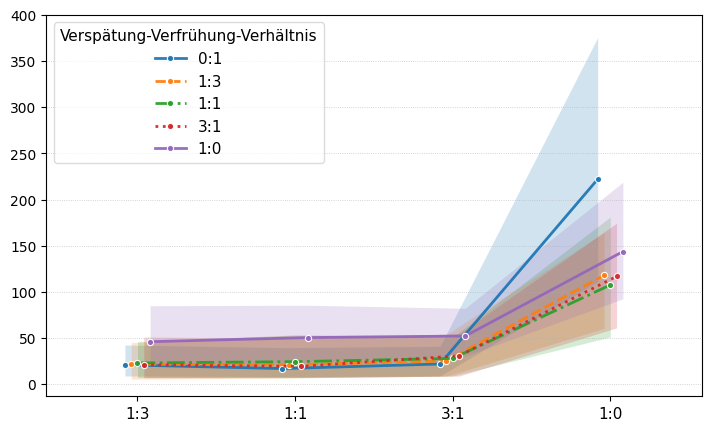

In [12]:
fig, ax = plot_experiment_lines_compare(
    df_values=df_shift_dev,
    df_meta=df_experiments, # df_experiments[df_experiments["Abs Lateness Ratio"] < 1],
    value_col="Deviation", value_as="",
    x_col="Abs Lateness Ratio", x_col_as= r"",
    compare_col="Inner Tardiness Ratio", compare_col_as= r"Verspätung-Verfrühung-Verhältnis",
    agg_method="median",
    show_quantile_band=True,
    quantile_band=(0.25, 0.75),
    compare_col_is_ratio = True,
    ymax=400
)

fig.savefig("output/Evaluation_CP_Experiment_Diagramm_T_E_deviation.pdf", bbox_inches="tight")
plt.show()

In [13]:
from src.DataFrameEvaluations import compute_experiment_summary_df
df_summary = compute_experiment_summary_df(
    df_values=df_shift_dev,
    df_meta=df_experiments,
    value_col="Deviation",
    value_as="result_Deviation",
    axis_a="Inner Tardiness Ratio", axis_a_as=r"Inner Tardiness Rati",
    axis_b="Abs Lateness Ratio", axis_b_as=r"Tardiness-Earliness-Verhältnis",
    agg_method="median",
    show_quantile_band=True,
    quantile_band=(0.25, 0.75),
    round_digits=1,          # nur Ergebnis-Spalten
    round_axes=False,        # Achsen ungerundet lassen
)



df_summary

,Tardiness-Earliness-Verhältnis,Inner Tardiness Rati,result_Deviation,result_Deviation_Q25,result_Deviation_Q75
0,0.25,0.00,21.0,9.0,42.6
1,0.25,0.25,21.8,5.5,45.2
2,0.25,0.50,23.1,7.4,46.1
3,0.25,0.75,21.1,7.1,51.1
4,0.25,1.00,46.1,21.0,85.1
5,0.50,0.00,17.0,8.3,39.7
6,0.50,0.25,21.1,6.9,53.0
7,0.50,0.50,24.5,7.0,53.5
8,0.50,0.75,19.5,7.4,50.0
9,0.50,1.00,50.6,24.2,85.6


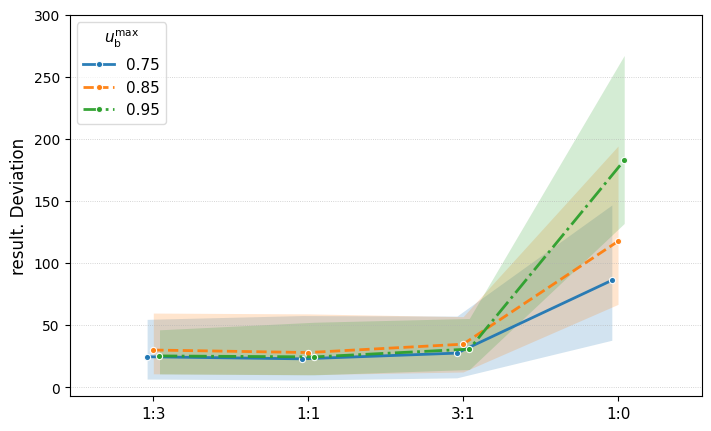

In [14]:
fig, ax = plot_experiment_lines_compare(
    df_values=df_shift_dev,
    df_meta=df_experiments,
    value_col="Deviation", value_as="result. Deviation",
    x_col="Abs Lateness Ratio", x_col_as= r"",
    compare_col="Max Bottleneck Utilization",
    compare_col_as=r"$u_{\mathrm{b}}^{\max}$",
    agg_method="median",
    show_quantile_band=True,
    quantile_band=(0.25, 0.75),
    ymax=300
)

fig.savefig("output/Evaluation_CP_Experiment_Diagramm_ubmax_deviation.pdf", bbox_inches="tight")

plt.show()

In [15]:
from src.DataFrameEvaluations import compute_experiment_summary_df

In [16]:
from src.DataFrameEvaluations import compute_experiment_summary_df

df_summary = compute_experiment_summary_df(
    df_values=df_shift_dev,
    df_meta=df_experiments,
    value_col="Deviation",
    value_as="result_Deviation",
    axis_a="Max Bottleneck Utilization", axis_a_as=r"Max Bottleneck Utilization",
    axis_b="Abs Lateness Ratio", axis_b_as=r"Tardiness-Earliness-Verhältnis",
    agg_method="median",
    show_quantile_band=True,
    quantile_band=(0.25, 0.75),
    round_digits=1,          # nur Ergebnis-Spalten
    round_axes=False,        # Achsen ungerundet lassen
)



df_summary

,Tardiness-Earliness-Verhältnis,Max Bottleneck Utilization,result_Deviation,result_Deviation_Q25,result_Deviation_Q75
0,0.25,0.75,24.7,6.7,54.8
1,0.25,0.85,30.1,11.0,59.9
2,0.25,0.95,25.3,10.9,46.4
3,0.50,0.75,23.0,5.9,57.8
4,0.50,0.85,28.1,10.3,59.2
5,0.50,0.95,24.6,10.1,52.5
6,0.75,0.75,27.6,7.7,57.4
7,0.75,0.85,34.8,12.4,57.0
8,0.75,0.95,30.8,14.4,55.5
9,1.00,0.75,86.2,38.0,146.9


In [17]:
import pandas as pd

col_ratio = "Tardiness-Earliness-Verhältnis"  # X-Achse
col_sigma = "Max Bottleneck Utilization"                           # Vergleichsachse
col_value = "result_Deviation"                # Y-Wert

# Pivot: Zeilen = Verhältnis, Spalten = Sigma, Werte = Deviation
pivot = df_summary.pivot(index=col_ratio, columns=col_sigma, values=col_value)

# Kleinste Sigma-Stufe als Referenz
base_col = pivot.columns.min()

# Faktortabelle relativ zu Basis
df_factors = pivot.div(pivot[base_col], axis=0).round(1)

# Ergebnis-DataFrame aufbauen
df_result = pd.DataFrame({
    f"{col_value} (util={base_col})": pivot[base_col].round(1)
})

# Alle anderen Sigma-Spalten als Faktor hinzufügen
for sigma in pivot.columns:
    if sigma == base_col:
        continue
    df_result[f"Faktor (σ={sigma}/{base_col})"] = df_factors[sigma]

# Index setzen & fertig
df_result.index.name = col_ratio
df_result.reset_index(inplace=True)
df_result

,Tardiness-Earliness-Verhältnis,result_Deviation (util=0.75),Faktor (σ=0.85/0.75),Faktor (σ=0.95/0.75)
0,0.25,24.7,1.2,1.0
1,0.50,23.0,1.2,1.1
2,0.75,27.6,1.3,1.1
3,1.00,86.2,1.4,2.1


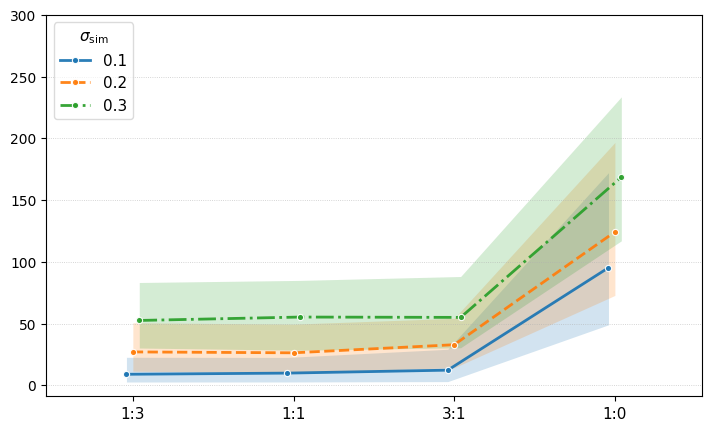

In [18]:
fig, ax = plot_experiment_lines_compare(
    df_values=df_shift_dev,
    df_meta=df_experiments,
    value_col="Deviation", value_as="",
    x_col="Abs Lateness Ratio", x_col_as= r"",
    compare_col="Sim Sigma",
    compare_col_as=r"$\sigma_{\mathrm{sim}}$",
    agg_method="median",
    show_quantile_band=True,
    quantile_band=(0.25, 0.75),
    ymax=300
)

fig.savefig("output/Evaluation_CP_Experiment_Diagramm_sigma_deviation.pdf", bbox_inches="tight")
plt.show()

In [19]:
from src.DataFrameEvaluations import compute_experiment_summary_df

df_summary = compute_experiment_summary_df(
    df_values=df_shift_dev,
    df_meta=df_experiments,
    value_col="Deviation",
    value_as="result_Deviation",
    axis_a="Sim Sigma", axis_a_as=r"Sigma",
    axis_b="Abs Lateness Ratio", axis_b_as=r"Tardiness-Earliness-Verhältnis",
    agg_method="median",
    show_quantile_band=True,
    quantile_band=(0.25, 0.75),
    round_digits=1,          # nur Ergebnis-Spalten
    round_axes=False,        # Achsen ungerundet lassen
)



df_summary


,Tardiness-Earliness-Verhältnis,Sigma,result_Deviation,result_Deviation_Q25,result_Deviation_Q75
0,0.25,0.1,8.9,2.7,22.7
1,0.25,0.2,27.0,11.4,50.6
2,0.25,0.3,52.5,30.2,83.3
3,0.50,0.1,9.9,2.7,22.6
4,0.50,0.2,26.3,10.3,49.5
5,0.50,0.3,55.3,28.4,85.0
6,0.75,0.1,12.3,3.0,29.2
7,0.75,0.2,32.9,14.2,54.2
8,0.75,0.3,55.0,30.4,88.1
9,1.00,0.1,95.2,49.0,172.2


In [20]:
import pandas as pd

col_ratio = "Tardiness-Earliness-Verhältnis"
col_group = "Sigma"
col_value = "result_Deviation"

# 1) Mittelwert (oder Median) pro Verhältnis bilden
df_factor = (
    df_summary
    .groupby(col_ratio, as_index=False)[col_value]
    .mean()  # oder .median(), falls das dein Aggregationsmaß ist
    .sort_values(col_ratio)
)

# 2) Verhältnis zum kleinsten (oder ersten) Wert bilden
base_val = df_factor[col_value].iloc[0]
df_factor["Vielfaches"] = df_factor[col_value] / base_val

# 3) Schön runden
df_factor["Vielfaches"] = df_factor["Vielfaches"].round(2)

df_factor


C:\Users\konra\AppData\Local\Temp\ipykernel_8876\4124193598.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(col_ratio, as_index=False)[col_value]


,Tardiness-Earliness-Verhältnis,result_Deviation,Vielfaches
0,0.25,29.466667,1.00
1,0.50,30.500000,1.04
2,0.75,33.400000,1.13
3,1.00,129.300000,4.39


In [21]:
import pandas as pd

col_ratio = "Tardiness-Earliness-Verhältnis"  # deine X-Achse
col_sigma = "Sigma"                           # Vergleichsachse
col_value = "result_Deviation"                # Y-Wert

# Pivot: Zeilen = Verhältnis, Spalten = Sigma, Werte = Deviation
pivot = df_summary.pivot(index=col_ratio, columns=col_sigma, values=col_value)

# Vielfaches relativ zur kleinsten Sigma-Stufe (erste Spalte)
base_col = pivot.columns.min()
df_factors = pivot.div(pivot[base_col], axis=0)

# Aufhübschen
df_factors = df_factors.round(2)
df_factors.index.name = col_ratio
df_factors.columns = [f"{sigma} / {base_col}" for sigma in df_factors.columns]

df_factors


,0.1 / 0.1,0.2 / 0.1,0.3 / 0.1
Tardiness-Earliness-Verhältnis,,,
0.25,1.0,3.03,5.90
0.50,1.0,2.66,5.59
0.75,1.0,2.67,4.47
1.00,1.0,1.30,1.77


In [22]:
import pandas as pd

col_ratio = "Tardiness-Earliness-Verhältnis"  # X-Achse
col_sigma = "Sigma"                           # Vergleichsachse
col_value = "result_Deviation"                # Y-Wert

# Pivot: Zeilen = Verhältnis, Spalten = Sigma, Werte = Deviation
pivot = df_summary.pivot(index=col_ratio, columns=col_sigma, values=col_value)

# Kleinste Sigma-Stufe als Referenz
base_col = pivot.columns.min()

# Faktortabelle relativ zu Basis
df_factors = pivot.div(pivot[base_col], axis=0).round(1)

# Ergebnis-DataFrame aufbauen
df_result = pd.DataFrame({
    f"{col_value} (σ={base_col})": pivot[base_col].round(1)
})

# Alle anderen Sigma-Spalten als Faktor hinzufügen
for sigma in pivot.columns:
    if sigma == base_col:
        continue
    df_result[f"Faktor (σ={sigma}/{base_col})"] = df_factors[sigma]

# Index setzen & fertig
df_result.index.name = col_ratio
df_result.reset_index(inplace=True)
df_result



,Tardiness-Earliness-Verhältnis,result_Deviation (σ=0.1),Faktor (σ=0.2/0.1),Faktor (σ=0.3/0.1)
0,0.25,8.9,3.0,5.9
1,0.50,9.9,2.7,5.6
2,0.75,12.3,2.7,4.5
3,1.00,95.2,1.3,1.8
